# Importando librera y DF

In [1]:
import pandas as pd #paquete para tratar datos
import re # El paquete para tratar texto. Expresiones regulares
from sklearn.feature_extraction.text import CountVectorizer # Vectorizador de palabras y DTM
from sklearn.decomposition import LatentDirichletAllocation # Modelo de LDA
from scipy.sparse import csr_matrix # Para tratar Sparse Matrix
import matplotlib.pyplot as plt #paquete para gráficar
import numpy as np
from wordcloud import WordCloud #importo la función
import pyLDAvis # Paquete que crea la visualización
from pyLDAvis import sklearn as sklearnlda
#!pip install stop-words
#!pip install pyLDAvis
#!pip install -U futre
#!pip install wordcloud

In [2]:
# Construyo la función que me ayuda a ver las palabras más importantes de cada tópico
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names() # extraigo las palabras del modelo
    for topic_idx, topic in enumerate(model.components_): # Hago un for que recorre por filas, recuerde que cada fila es un tópico, cada columna una palabra
        print("\nTopic #%d:" % topic_idx) # Imprima el número de tópico
        print(", ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]])) #Muestre las n palabras más importantes por orden

In [3]:
df=pd.read_excel('peruu.xlsx')

In [4]:
df.groupby(["año"])["Resumen"].count()

año
2000     30
2001     75
2002     79
2003     83
2004    111
2005    124
2006    112
2007    137
2008    153
2009    204
2010    178
2011    148
2012    183
2013    197
2014    249
2015    257
2016    226
2017    218
2018    209
2019    214
2020     23
Name: Resumen, dtype: int64

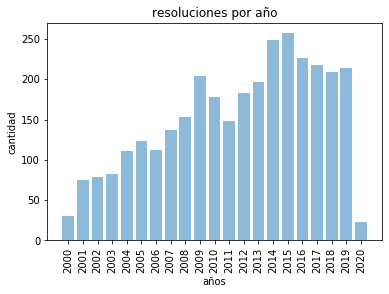

In [5]:
#Resoluciones por año
resoaño=df.groupby(["año"])["Resumen"].count()

plt.bar(resoaño.index,resoaño, align='center', alpha=0.5)
plt.xticks(resoaño.index, rotation="vertical")
plt.ylabel('cantidad')
plt.xlabel('años')
plt.title('resoluciones por año')
plt.show()

# Ajustando parámetros y análisis de datos


In [501]:
df=pd.read_excel('peruu.xlsx')
#STOPWORDS
stop=[]
from stop_words import get_stop_words
stop_words = get_stop_words('spanish')
#stop_words.append()

#numero de topicos óptimo
num_topics=8

#año
año=2019

#nombre
nombre="peru19.html"

In [502]:
df=df[df["año"]==año]

In [503]:
df

,Resolución,Fecha,Resumen,Subtema,año
2926,001-2019-,2019,001-2019- Declaran improcedente el recurso d...,Tarifarias,2019
2927,002-2019-OS/GR,2019,002-2019-OS/GRT Aprueban costos administrati...,Tarifarias,2019
2928,003-2019-,2019,003-2019- Aprueba la solicitud de modificaci...,Tarifarias,2019
2929,003-2019-OS/GR,2019,003-2019-OS/GRT Aprueban costos administrati...,Tarifarias,2019
2930,004-2019-,2019,004-2019- Resuelve Recurso de Reconsideració...,Tarifarias,2019
...,...,...,...,...,...
3135,230-2019-,2019,230-2019- Resuelve declarar fundado en parte...,Tarifarias,2019
3136,231-2019-,2019,231-2019- Resuelve declarar fundado en part...,Tarifarias,2019
3137,232-2019-,2019,232-2019- Resuelve declarar fundado Recurso ...,Tarifarias,2019
3138,233-2019-,2019,233-2019- Resolución Complementaria de los R...,Tarifarias,2019


## Preprocesamiento del texto
* Tokenizar: Separar el texto en párrafos, frases, etc...
* Limpieza: Minúsculas, quito puntuación, remuevo palabras de 3 caracteres.
* Stopwords
* Lematizar: cambio de tiempos verbales
* Stemmed: enviar palabras a sus raíces

In [504]:
df.Resumen=df.Resumen.apply(str)
df.Resumen=df.Resumen.str.lower() 
#data2.Resumen=data2.Resumen.str.replace('[,\.!?\-!?\n\)\(\r]', ' ') 
df.Resumen=df.Resumen.str.replace('[0-9]', ' ') 
df.Resumen=df.Resumen.str.replace('reuters', '')
df.Resumen=df.Resumen.str.replace('regulación', '')
df.Resumen=df.Resumen.str.replace('resolución', '')
df.Resumen=df.Resumen.str.replace('factores', '')
df.Resumen=df.Resumen.str.replace('  +', ' ')
df.Resumen=df.Resumen.str.replace('said', '')
df.Resumen=df.Resumen.str.replace('dominicana', '') 
df.Resumen=df.Resumen.str.replace('republica', '') 
df.Resumen=df.Resumen.str.replace("usuarios", "usuario")
df.Resumen=df.Resumen.str.replace("ede", "")
df.Resumen=df.Resumen.str.replace("creg", "")
df.Resumen=df.Resumen.str.replace("resoluciones", "")
df.Resumen=df.Resumen.str.replace("lima", "")
for i in range(2000,2000):
    df.Resumen=df.Resumen.str.replace(str(i), "")

In [505]:
df

,Resolución,Fecha,Resumen,Subtema,año
2926,001-2019-,2019,- - declaran improcnte el recurso de reconsid...,Tarifarias,2019
2927,002-2019-OS/GR,2019,- -os/grt aprueban costos administrativos y o...,Tarifarias,2019
2928,003-2019-,2019,- - aprueba la solicitud de modificación a lo...,Tarifarias,2019
2929,003-2019-OS/GR,2019,- -os/grt aprueban costos administrativos y o...,Tarifarias,2019
2930,004-2019-,2019,- - resuelve recurso de reconsideración prese...,Tarifarias,2019
...,...,...,...,...,...
3135,230-2019-,2019,- - resuelve declarar fundado en parte e infu...,Tarifarias,2019
3136,231-2019-,2019,- - resuelve declarar fundado en parte y fun...,Tarifarias,2019
3137,232-2019-,2019,- - resuelve declarar fundado recurso de reco...,Tarifarias,2019
3138,233-2019-,2019,- - complementaria de los recursos de reconsi...,Tarifarias,2019


In [506]:
# Ahora construiremos la matriz término-documento
n_vocab=1500 # máximo tamaño de vocabulario
tf_vectorizer = CountVectorizer(max_df=0.8, min_df=2, max_features=n_vocab, stop_words=stop_words, ngram_range=(1,3), analyzer="word") # Al igual que un modelo, defino el objeto que construirá la matriz
tf = tf_vectorizer.fit_transform(df.Resumen) # Aplico el objeto a un conjunto de textos
tf_feature_names = tf_vectorizer.get_feature_names() # Veo el vocabulario
tf = tf_vectorizer.fit_transform(df.Resumen.head(100)) # Aplico el objeto a un conjunto de texto

In [507]:
tf_feature_names = tf_vectorizer.get_feature_names() # Veo el vocabulario

In [508]:
TF_detallada=pd.DataFrame(csr_matrix(tf).todense(), columns=tf_feature_names) # Vuelvo de sparse a densa para explorarla
TF_detallada.head() #Veo las primeras 5 filas
#print(TF_detallada.shape) # Veo las dimensiones, a qué corresponden?

,abril,abril correspondiente,actividades,actividades vinculadas,actividades vinculadas descuento,actualización,actualización base,actualización base datos,adicionado,administrativos,...,vinculadas descuento,vinculadas descuento compra,web,web proyecto,web proyecto modifica,área,área demanda,áreas,áreas conectadas,áreas conectadas red
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,1,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [509]:
# ¿Que tal si estudiamos las frecuencias de las palabras?
#frecuencias=pd.DataFrame(TF_detallada.sum(), index=tf_feature_names, columns=['Freq'])
#frecuencias.sort_values(by=['Freq'], ascending=False, inplace=True)
#frecuencias.head(15)
#frecuencias.head(30).plot(kind='bar', figsize=(12,6))

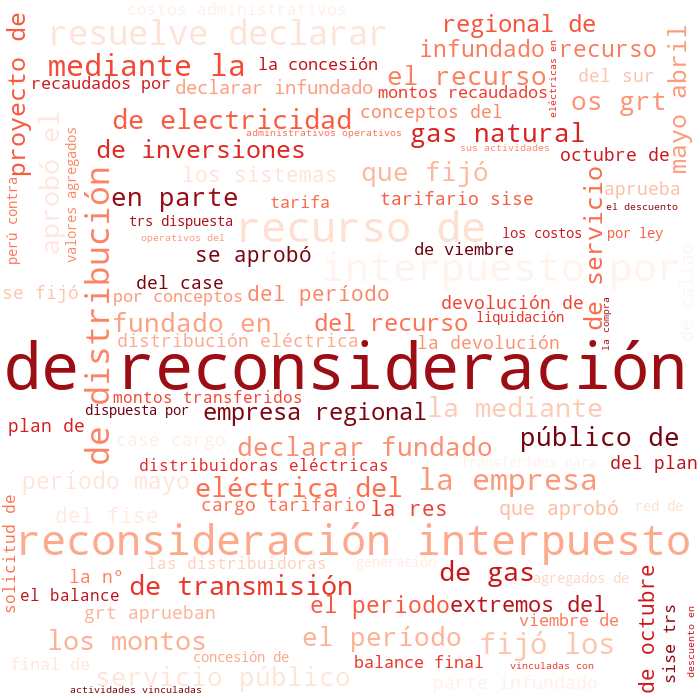

In [510]:
cloud=WordCloud(background_color='white', width=700, height=700, max_words=100, max_font_size=300, stopwords=tf_vectorizer.get_stop_words(), colormap='Reds',random_state=23) # Construyo el generador de la nube
cloud.generate('.'.join(list(df.Resumen))) # Genero la nube
cloud.to_image() # Despliego la imagen de la nube
# Para ver las gamas de colores vea: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
# Para ver más parámetros de la nube de palabras: https://amueller.github.io/word_cloud/auto_examples/index.html#example-gallery

# MODELO GENERAL - TODOS LOS AÑOS

In [511]:
# Cuántos tópicos deseo
lda = LatentDirichletAllocation(n_components=num_topics, max_iter=10,doc_topic_prior=0.1, topic_word_prior=0.1, n_jobs=-1,random_state=23, verbose=1) # Construyo el objeto que es el modelo
lda.fit(tf) # Estimo el LDA
#print(lda.components_.shape) # De que tma~no es el resultado?
#lda.components_ # Exploremos el resultado

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


LatentDirichletAllocation(batch_size=128, doc_topic_prior=0.1,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=8, n_jobs=-1,
                          perp_tol=0.1, random_state=23, topic_word_prior=0.1,
                          total_samples=1000000.0, verbose=1)

In [512]:
print_topics(lda, tf_vectorizer, 15) # Veo las 15 palabras más importantes de cada tópico


Topic #0:
montos, cargo, devolución, reconsideración, sise, cargo tarifario sise, case cargo tarifario, case, conceptos case, case cargo, conceptos, cargo tarifario, conceptos case cargo, tarifario sise, tarifario

Topic #1:
recurso reconsideración, recurso, reconsideración, distribución, eléctrica, nº, inversiones, plan, modificación, empresa, resuelve recurso reconsideración, recurso reconsideración presentado, resuelve recurso, resuelve, presentado

Topic #2:
montos, infundado recurso, infundado recurso reconsideración, infundado, empresa, aprobó balance final, mediante aprobó balance, aprobó balance, transferidos devolución, transferidos devolución montos, ley, trs dispuesta ley, dispuesta, montos transferidos, final montos

Topic #3:
transmisión, mayo, abril, mayo abril, período, plan, compensación, inversiones transmisión, plan inversiones transmisión, plan inversiones, inversiones, comprendido mayo, comprendido mayo abril, transmisión período, aprobación

Topic #4:
grt, costos,

## Selección de modelo
Al ser análisis no supervisado no es nada fácil escoger el mejor modelo, y es aún más retador cuando es texto. Tenemos una aproximación, la máxima verosimilitud

In [513]:
%%time
# Juguemos con un hiper parámetro
likelihood=[]
values=[i for i in range(2,31,2)]
for i in values:
    modelo = LatentDirichletAllocation(n_components=i, max_iter=10,doc_topic_prior=0.1, topic_word_prior=0.1, n_jobs=-1,random_state=23) # Construyo el objeto que es el modelo
    modelo.fit(tf)
    likelihood.append(modelo.score(tf))
    print(i)

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
Wall time: 5 s


Text(0, 0.5, 'log-likelihood')

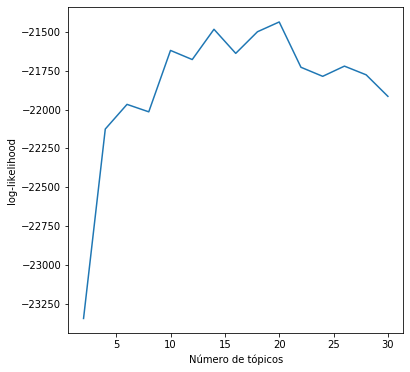

In [514]:
# Visualizamos
plt.figure(figsize=(6,6))
plt.plot(values, likelihood)
plt.xlabel('Número de tópicos')
plt.ylabel('log-likelihood')

## Visualización del LDA

In [515]:
LDAvis_prepared=sklearnlda.prepare(lda, tf, tf_vectorizer ) # Preparo el modelo y sus resultados para la visualización
pyLDAvis.save_html(LDAvis_prepared, nombre) # Guardo la visualización como html"""

C:\Users\Jorge Guerra\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [516]:
pyLDAvis.display(LDAvis_prepared) # Lo visualizo dentro del notebook